In [20]:
# https://github.com/pytorch/vision/blob/main/gallery/transforms/helpers.py
import matplotlib.pyplot as plt
import torch
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks

def plot(imgs, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            boxes = None
            masks = None
            if isinstance(img, tuple):
                img, target = img
                masks = target.Mask
            if boxes is not None:
                img = draw_bounding_boxes(img, boxes, colors="yellow", width=3)
            if masks is not None:
                img = draw_segmentation_masks(img, masks.to(torch.bool), colors=["green"] * masks.shape[0], alpha=.65)

            ax = axs[row_idx, col_idx]

            ax.imshow(img.permute(1, 2, 0).numpy(), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [5]:
import torch
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'

from torchvision.transforms import v2
from torchvision.io import read_image, ImageReadMode
from transforms import CustomCrop
torch.manual_seed(1)

train_transforms = v2.Compose(
    [
        v2.RandomHorizontalFlip(),
        v2.RandomPerspective(),
        v2.RandomAffine(degrees=180, translate=(0.5, 0.5)),
        v2.RandomResizedCrop((256, 256), scale=(0.25, 1.0), antialias=True, ratio=(1.0, 1.0)),
        v2.RandomApply([v2.RandomResize(128, 256, antialias=True), v2.Resize((256, 256), antialias=True)]),
        v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    ]
)


wholebody_train_transforms = v2.Compose(
    [
        v2.RandomHorizontalFlip(),
        v2.RandomPerspective(),
        v2.RandomRotation(180),
        CustomCrop((256, 512)),
        v2.Resize((256, 256), antialias=True),
        v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    ]
)

img = read_image("data/'19/images/Int. (SNU)/0044.jpg")
mask = read_image("data/'19/labels/Int. (SNU)/동현/0044.png", ImageReadMode.GRAY)
wb = read_image("data/'20 Int. (SNU-adult)/images/NL/DSC00669.png")
print(f"{type(img) = }, {img.dtype = }, {img.shape = }")
print(f"{type(wb) = }, {wb.dtype = }, {wb.shape = }")

type(img) = <class 'torch.Tensor'>, img.dtype = torch.uint8, img.shape = torch.Size([3, 621, 621])
type(wb) = <class 'torch.Tensor'>, wb.dtype = torch.uint8, wb.shape = torch.Size([3, 1509, 2844])


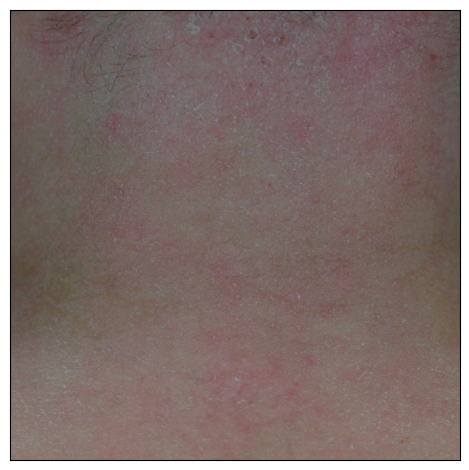

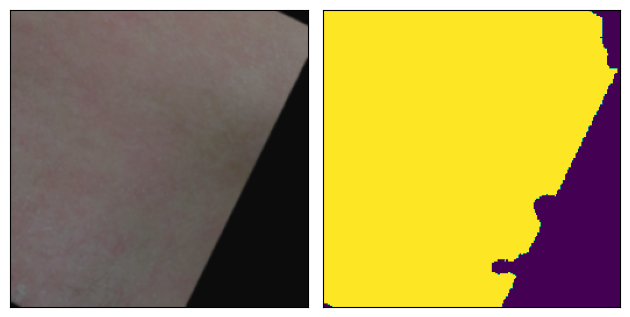

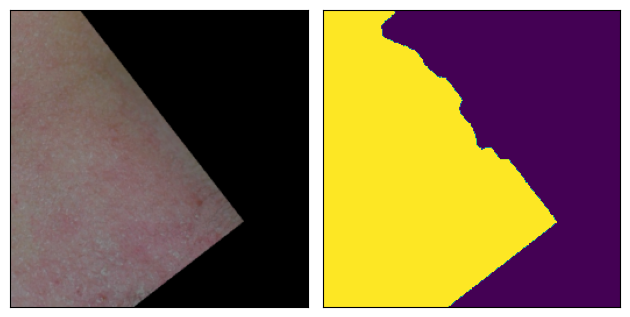

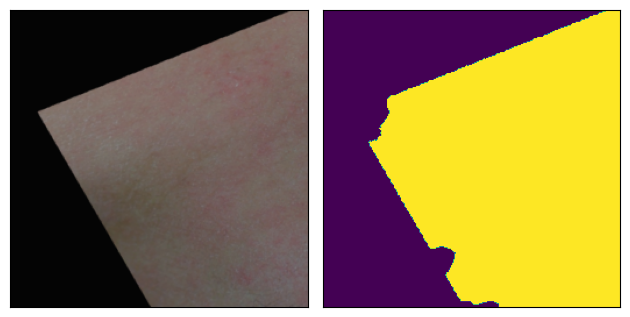

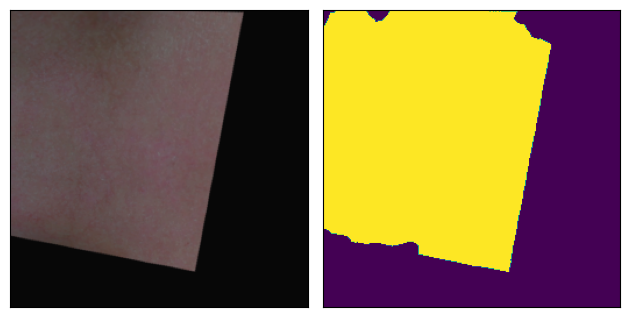

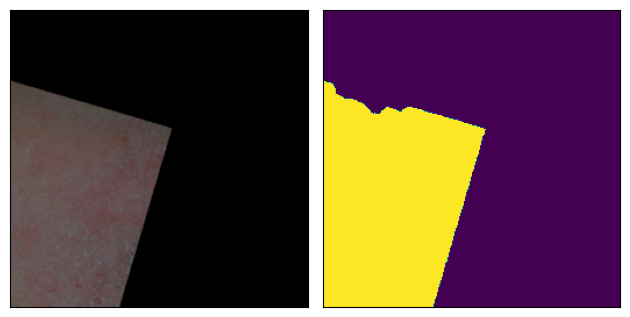

In [22]:
plot([img])

from torchvision import tv_tensors

mask = tv_tensors.Mask(mask)
for i in range(5):
    input = train_transforms(img, mask)
    plot(input)

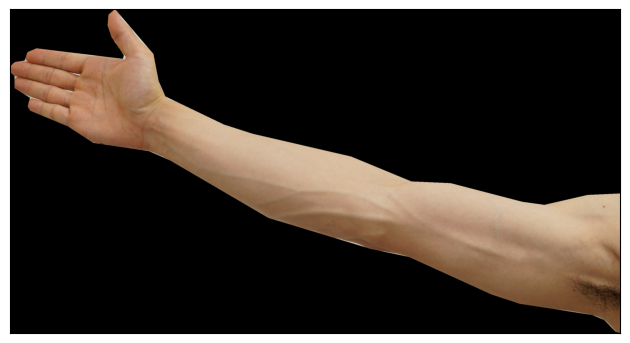

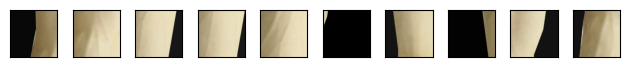

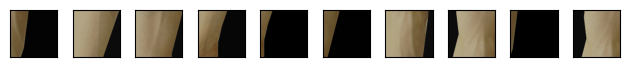

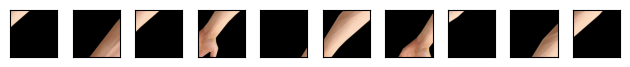

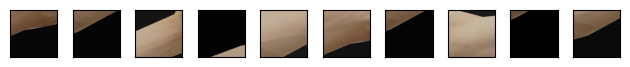

In [25]:
plot([wb])
for i in range(4):
    plot(wholebody_train_transforms(wb))

tensor([[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0039],
        [0.0039, 0.0078, 0.0117,  ..., 0.0117, 0.0078, 0.0039],
        ...,
        [0.0039, 0.0078, 0.0117,  ..., 0.0117, 0.0078, 0.0039],
        [0.0039, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0039],
        [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039]])


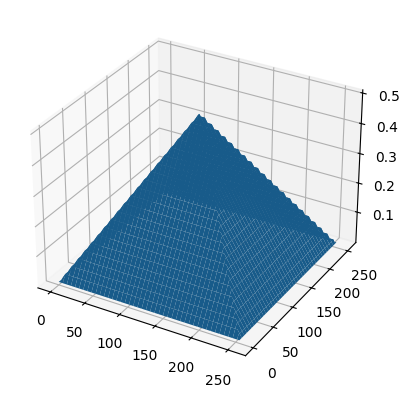

In [12]:
import matplotlib.pyplot as plt
import torch
xs = torch.cat([torch.arange(1, 129), torch.arange(128, 0, -1)]) / 128
ys = torch.cat([torch.arange(1, 129), torch.arange(128, 0, -1)]) / 128
x, y = torch.meshgrid(xs, ys, indexing='xy')
z = torch.min(torch.stack([x, y]), 0)[0]
ax = plt.axes(projection='3d')
x = torch.arange(256)
y = torch.arange(256)
x, y = torch.meshgrid(x, y, indexing='xy')
print(z)
ax.plot_surface(x.numpy(), y.numpy(), z.numpy())
plt.show()